In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def plot_result(X, y, centers, k, title):
    # Plot X
    for i in range(K):
        plt.scatter(X[y == i, 0],
                    X[y == i, 1],
                    s=50,
                    # c='lightgreen',
                    # marker='s',
                    label='cluster ' + str(i + 1))
    # Plot centroids
    plt.scatter(centers[:, 0],
                centers[:, 1],
                s=250,
                marker='*',
                c='red',
                label='centroids')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
# 1. init center points
def init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [4]:
# 2.  grouping
def group_data(X, centers):
    y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        d = X[i] - centers
        d = np.linalg.norm(d, axis=1)
        y[i] = np.argmin(d)
    return y

In [5]:
# 3. Update center points
def update_centers(X, y, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        X_i = X[y == i, :]
        centers[i] = np.mean(X_i, axis=0)
    return centers

In [6]:
# kmeans algorithm
def kmeans(X, k):
    centers = init_centers(X, k)
    y = []
    iter = 0
    while True:
        # save pre-loop groups
        y_old = y
        # grouping
        y = group_data(X, centers)
        # break while loop if groups are not changed
        if np.array_equal(y, y_old):
            break
        #  update centers
        centers = update_centers(X, y, k)
        # plot current state
        iter += 1
        plot_result(X, y, centers, k, 'iter: ' + str(iter))
    return (centers, y)


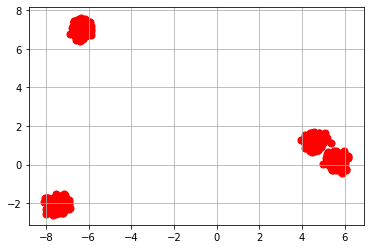

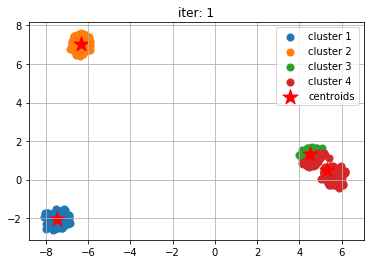

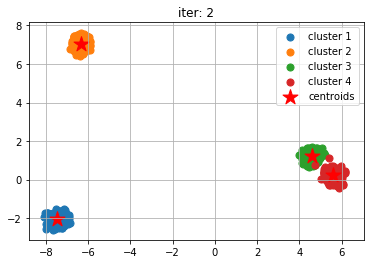

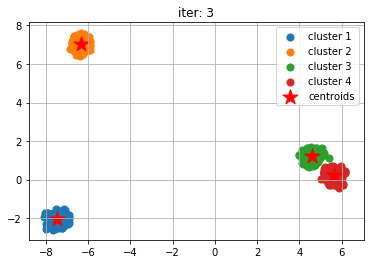

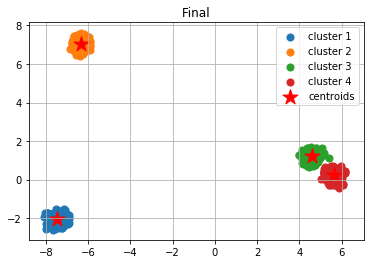

In [7]:
# group size
K = 4
# create random data
X, _ = make_blobs(n_samples=1500,
                  n_features=2,
                  centers=K,
                  cluster_std=0.2,
                  shuffle=True,
                  random_state=28)
# show data
plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', s=50)
plt.grid()
plt.show()
# run k-means
centers, y = kmeans(X, K)
# plot result
plot_result(X, y, centers, K, 'Final')